In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
train = pd.read_csv('train_NIR5Yl1.csv')
test = pd.read_csv('test_8i3B3FC.csv')

In [34]:
train.shape, test.shape

((330045, 7), (141448, 6))

In [35]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test],ignore_index=True)

In [36]:
data

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,source
0,52664,a,3942.0,2.0,155623,7855.0,42.0,train
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,train
2,468453,c,1358.0,4.0,56177,8067.0,60.0,train
3,96996,a,264.0,3.0,168793,27064.0,9.0,train
4,131465,c,4271.0,4.0,112223,13986.0,83.0,train
...,...,...,...,...,...,...,...,...
471488,47187,j,4681.0,4.0,152060,2469.0,NaN,test
471489,329126,j,7782.0,3.0,89235,18998.0,NaN,test
471490,282334,p,435.0,5.0,119788,57048.0,NaN,test
471491,386629,o,176.0,3.0,86824,10193.0,NaN,test


In [37]:
data.isnull().sum()

ID                 0
Tag                0
Reputation         0
Answers            0
Username           0
Views              0
Upvotes       141448
source             0
dtype: int64

In [38]:
data.nunique()

ID            471493
Tag               10
Reputation     17414
Answers           65
Username      175739
Views          97801
Upvotes         7239
source             2
dtype: int64

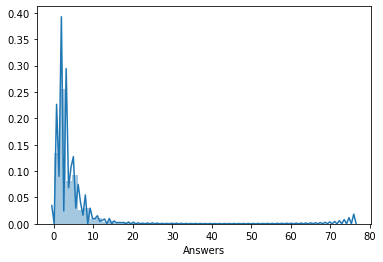

In [39]:
sns.distplot(data['Answers'])
plt.show()

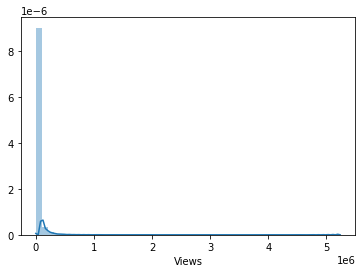

In [40]:
sns.distplot(data['Views'])
plt.show()

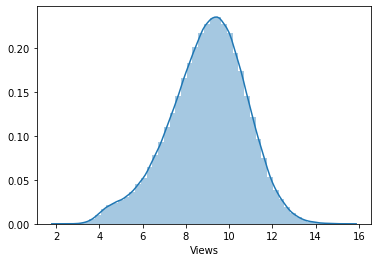

In [41]:
data['Views'] = np.log(data['Views'])
sns.distplot(data['Views'])
plt.show()

In [42]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Tag']= label_encoder.fit_transform(data['Tag'])

In [43]:
data

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,source
0,52664,0,3942.0,2.0,155623,8.968906,42.0,train
1,327662,0,26046.0,12.0,21781,10.929547,1175.0,train
2,468453,1,1358.0,4.0,56177,8.995537,60.0,train
3,96996,0,264.0,3.0,168793,10.205960,9.0,train
4,131465,1,4271.0,4.0,112223,9.545812,83.0,train
...,...,...,...,...,...,...,...,...
471488,47187,4,4681.0,4.0,152060,7.811568,NaN,test
471489,329126,4,7782.0,3.0,89235,9.852089,NaN,test
471490,282334,6,435.0,5.0,119788,10.951648,NaN,test
471491,386629,5,176.0,3.0,86824,9.229456,NaN,test


In [44]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

# Drop unnecessary columns:
test.drop(['Upvotes','source'],axis=1,inplace=True)
train.drop('source',axis=1,inplace=True)

In [45]:
train.drop('ID',axis=1,inplace=True)
test.drop("ID",axis=1,inplace = True)

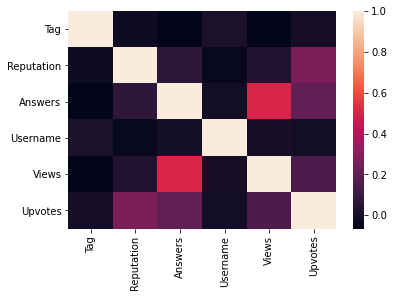

In [48]:
sns.heatmap(train.corr())

In [17]:
X = train.drop('Upvotes',axis=1)
y = train['Upvotes']

In [25]:
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

In [27]:
models = []
models.append(('Linear', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))
models.append(('LightGBM', LGBMRegressor()))
models.append(('Tree', DecisionTreeRegressor()))
models.append(('Forest', RandomForestRegressor()))
models.append(('Boost', XGBRegressor()))
models.append(('Neighbor', KNeighborsRegressor()))
models.append(('Hist', HistGradientBoostingRegressor()))
models.append(('Ada', AdaBoostRegressor()))

In [30]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #print("Absolute mean error for ", name, ":", metrics.mean_absolute_error(y_test, y_pred))
    #print("Mean squared error for ", name, ":", metrics.mean_squared_error(y_test, y_pred))
    print("Root mean squared error for ", name, ":", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root mean squared error for  Linear : 2436.635284590288
Root mean squared error for  Lasso : 2436.620370989781
Root mean squared error for  Ridge : 2436.635274594668
Root mean squared error for  LightGBM : 1381.8183370164072
Root mean squared error for  Tree : 1304.0149706079283
Root mean squared error for  Forest : 843.7915899109895
Root mean squared error for  Boost : 887.9769137360926
Root mean squared error for  Neighbor : 2344.7021875210758
Root mean squared error for  Hist : 1210.4110609930315
Root mean squared error for  Ada : 2995.443586044012
